In [741]:
import pickle
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_arch
from statsmodels.compat import lzip
import statsmodels.api as sm
import pandas as pd
import numpy as np
from arch import arch_model
import yfinance as yf
import pandas as pd
import shap

In [742]:
!pwd

/Users/ale/Desktop/visualstudio/ciencias de datos/pi_2024


In [743]:
import yfinance as yf
import pandas as pd

# Lista de tickers de las acciones a consultar
tickers = [
    "LYB", "AXP", "VZ", "AVGO", "BA", "ABBV", "CAT", "JPM", "CVX", "KO", 'SPY', "TSLA", "CMG", "NVDA"
]

# Fecha de inicio y fin para los datos
start_date = "2019-05-01"
end_date = "2024-03-01"

# Descargar datos de precios mensuales
data = yf.download(tickers, start=start_date, end=end_date, interval="1d")

# Mostrar los primeros registros para revisar
print(data.head())

[*********************100%%**********************]  14 of 14 completed

Price       Adj Close                                                  \
Ticker           ABBV        AVGO         AXP          BA         CAT   
Date                                                                    
2019-05-01  62.870918  271.445496  109.096527  367.974762  122.821297   
2019-05-02  62.536232  268.823883  109.310951  366.998138  120.171921   
2019-05-03  62.727463  268.730194  111.268753  367.642700  123.630287   
2019-05-06  63.165810  265.206329  111.259438  362.896545  121.585526   
2019-05-07  62.121803  261.563141  110.215256  348.863068  118.838364   

Price                                                                ...  \
Ticker             CMG        CVX         JPM         KO        LYB  ...   
Date                                                                 ...   
2019-05-01  688.559998  93.524307   99.325699  41.597603  64.187065  ...   
2019-05-02  707.869995  92.389099   99.541328  41.426388  63.808487  ...   
2019-05-03  709.520020  93.095627  

In [744]:
returns = data['Adj Close'].pct_change()

In [745]:
returns = returns.dropna()

## Importar economicos

In [746]:
economics = pd.read_csv('economics_clean.csv', delimiter=',')

In [747]:
economics.head()

,Date,gdp,cpi,unemployment_rate
0,2019-05-01,3.4,1.8,3.6
1,2019-06-01,3.4,1.6,3.6
2,2019-07-01,4.6,1.8,3.7
3,2019-08-01,4.6,1.7,3.6
4,2019-09-01,4.6,1.7,3.5


In [748]:
economics['Date'] = pd.to_datetime(economics['Date'])
economics.set_index('Date', inplace=True)


In [749]:
economics.head()

,gdp,cpi,unemployment_rate
Date,,,
2019-05-01,3.4,1.8,3.6
2019-06-01,3.4,1.6,3.6
2019-07-01,4.6,1.8,3.7
2019-08-01,4.6,1.7,3.6
2019-09-01,4.6,1.7,3.5


In [750]:
economics.columns

Index(['gdp', 'cpi', 'unemployment_rate'], dtype='object')

In [751]:
for column in economics.columns:
    economics[column] = (1 + economics[column]) ** (1/30) - 1

In [ ]:
sofr = pd.read_excel('Economics')

# Importar sentiment average

In [752]:
!pwd

/Users/ale/Desktop/visualstudio/ciencias de datos/pi_2024


In [753]:
df = pd.read_excel('diarios.xlsx')

In [754]:
df.head()

,Unnamed: 0,LYB UN Equity,AXP UN Equity,VZ UN Equity,AVGO UW Equity,BA UN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,ABBV UN Equity,CMG US Equity,TSLA US Equity,NVDA US Equity
0,Date,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average,Twitter Sentiment Daily Average
1,2019-05-13 00:00:00,0,-0.0498,-0.0149,0.0325,-0.0566,-0.1278,0.0982,0.0557,-0.0074,0.0494,-0.0144,-0.0087,-0.0364
2,2019-05-14 00:00:00,-0.0384,0,-0.0182,0.1987,-0.0543,-0.1077,-0.0246,0.0803,0.0194,-0.0171,-0.0233,-0.0255,-0.025
3,2019-05-15 00:00:00,0.0521,-0.0077,0.0029,0.0708,-0.0243,-0.0749,0.026,0.0298,0.1013,0.0166,0.0422,-0.0151,0.0188
4,2019-05-16 00:00:00,0.1392,0.0022,0.012,-0.0347,-0.0183,-0.0354,-0.1119,0.0755,-0.0033,-0.0087,0.0524,-0.0124,0.0184


In [755]:
tickers = ["LYB UN Equity", "AXP UN Equity", "VZ UN Equity", "AVGO UW Equity", "BA UN Equity",
           "CAT UN Equity", "JPM UN Equity", "CVX UN Equity", "KO UN Equity", "ABBV UN Equity", 'CMG US Equity', 'TSLA US Equity', 'NVDA US Equity']

In [756]:
organized_data = pd.DataFrame()

In [757]:
if 'Date' in df.iloc[0].values:
    df.columns = df.iloc[0]
    df = df[1:]

In [758]:
# Crear un nuevo DataFrame con nombres de columnas limpios
new_columns = []
for ticker in tickers:
    new_columns.extend([
        f'{ticker} Twitter Sentiment Daily Average'
    ])

# Asignar nuevos nombres de columna
df.columns = ['Date'] + new_columns

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
# Mostrar el DataFrame reestructurado
df.head

<bound method NDFrame.head of            LYB UN Equity Twitter Sentiment Daily Average  \
Date                                                       
2019-05-13                                             0   
2019-05-14                                       -0.0384   
2019-05-15                                        0.0521   
2019-05-16                                        0.1392   
2019-05-17                                        0.0127   
...                                                  ...   
2024-05-06                                             0   
2024-05-07                                             0   
2024-05-08                                             0   
2024-05-09                                             0   
2024-05-10                                             0   

           AXP UN Equity Twitter Sentiment Daily Average  \
Date                                                       
2019-05-13                                       -0.0498   
2019-05-1

In [759]:
df.head()

,LYB UN Equity Twitter Sentiment Daily Average,AXP UN Equity Twitter Sentiment Daily Average,VZ UN Equity Twitter Sentiment Daily Average,AVGO UW Equity Twitter Sentiment Daily Average,BA UN Equity Twitter Sentiment Daily Average,CAT UN Equity Twitter Sentiment Daily Average,JPM UN Equity Twitter Sentiment Daily Average,CVX UN Equity Twitter Sentiment Daily Average,KO UN Equity Twitter Sentiment Daily Average,ABBV UN Equity Twitter Sentiment Daily Average,CMG US Equity Twitter Sentiment Daily Average,TSLA US Equity Twitter Sentiment Daily Average,NVDA US Equity Twitter Sentiment Daily Average
Date,,,,,,,,,,,,,
2019-05-13,0,-0.0498,-0.0149,0.0325,-0.0566,-0.1278,0.0982,0.0557,-0.0074,0.0494,-0.0144,-0.0087,-0.0364
2019-05-14,-0.0384,0,-0.0182,0.1987,-0.0543,-0.1077,-0.0246,0.0803,0.0194,-0.0171,-0.0233,-0.0255,-0.025
2019-05-15,0.0521,-0.0077,0.0029,0.0708,-0.0243,-0.0749,0.026,0.0298,0.1013,0.0166,0.0422,-0.0151,0.0188
2019-05-16,0.1392,0.0022,0.012,-0.0347,-0.0183,-0.0354,-0.1119,0.0755,-0.0033,-0.0087,0.0524,-0.0124,0.0184
2019-05-17,0.0127,0.0165,-0.0009,0.0284,-0.0081,-0.0803,-0.1576,0.0878,0.0161,0.0151,0.0642,-0.0627,0.0437


In [760]:
df = df.astype('float64')

In [761]:
df.to_csv('sentiment_clean.csv', index= True)

In [762]:
tickers = ["LYB UN Equity", "AXP UN Equity", "VZ UN Equity", "AVGO UW Equity", "BA UN Equity",
           "CAT UN Equity", "JPM UN Equity", "CVX UN Equity", "KO UN Equity", "ABBV UN Equity", 'CMG US Equity', 'TSLA US Equity', 'NVDA US Equity']

dfs = {}  # Diccionario para almacenar los DataFrames de cada acción
for ticker in tickers:
    # Asumiendo que las columnas están etiquetadas con el nombre de la acción
    action_columns = [col for col in df.columns if ticker in col]
    dfs[ticker] = df[action_columns]

In [763]:
dfs['LYB UN Equity'].head()

,LYB UN Equity Twitter Sentiment Daily Average
Date,
2019-05-13,0.0000
2019-05-14,-0.0384
2019-05-15,0.0521
2019-05-16,0.1392
2019-05-17,0.0127


In [764]:
LYB_sent = dfs['LYB UN Equity']
AVGO_sent = dfs['AVGO UW Equity']
AXP_sent = dfs['AXP UN Equity']
VZ_sent = dfs['VZ UN Equity']
BA_sent = dfs['BA UN Equity']
ABBV_sent = dfs['ABBV UN Equity']
CAT_sent = dfs['CAT UN Equity']
JPM_sent = dfs['JPM UN Equity']
CVX_sent = dfs['CVX UN Equity']
KO_sent = dfs['KO UN Equity']
CMG_sent = dfs['CMG US Equity']
TSLA_sent = dfs['TSLA US Equity']
NVDA_sent = dfs['NVDA US Equity']
LYB_sent.head()

,LYB UN Equity Twitter Sentiment Daily Average
Date,
2019-05-13,0.0000
2019-05-14,-0.0384
2019-05-15,0.0521
2019-05-16,0.1392
2019-05-17,0.0127


# Combinar DF

In [765]:
returns.head()

Ticker,ABBV,AVGO,AXP,BA,CAT,CMG,CVX,JPM,KO,LYB,NVDA,SPY,TSLA,VZ
Date,,,,,,,,,,,,,,
2019-05-02,-0.005323,-0.009658,0.001965,-0.002654,-0.021571,0.028044,-0.012138,0.002171,-0.004116,-0.005898,0.015072,-0.002159,0.043118,0.008316
2019-05-03,0.003058,-0.000349,0.017910,0.001756,0.028778,0.002331,0.007647,0.006152,0.006820,0.012331,-0.000983,0.009788,0.044777,0.004387
2019-05-06,0.006988,-0.013113,-0.000084,-0.012910,-0.016539,0.010077,0.009636,-0.008870,-0.005131,-0.020800,-0.017267,-0.004115,0.001216,-0.005765
2019-05-07,-0.016528,-0.013737,-0.009385,-0.038671,-0.022594,-0.014163,-0.001098,-0.016335,-0.009697,-0.023002,-0.037476,-0.016699,-0.032427,-0.004920
2019-05-08,0.000513,-0.012691,-0.006175,0.007054,-0.012868,0.004317,-0.006510,-0.005300,-0.003125,-0.003123,0.004679,-0.001390,-0.008986,-0.004415


In [766]:
LYB_sent.head()

,LYB UN Equity Twitter Sentiment Daily Average
Date,
2019-05-13,0.0000
2019-05-14,-0.0384
2019-05-15,0.0521
2019-05-16,0.1392
2019-05-17,0.0127


In [767]:
economics.head()

,gdp,cpi,unemployment_rate
Date,,,
2019-05-01,0.050627,0.034916,0.052185
2019-06-01,0.050627,0.032363,0.052185
2019-07-01,0.059106,0.034916,0.052939
2019-08-01,0.059106,0.033663,0.052185
2019-09-01,0.059106,0.033663,0.051414


In [848]:
economics.shape

(1765, 3)

# 1. LYB

In [768]:

start_date = returns.index.min()
end_date = returns.index.max()
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Reindexar los DataFrames
LYB_sent = LYB_sent.reindex(date_range, method='ffill')  # Usamos forward fill para llenar los datos faltantes
economics = economics.reindex(date_range, method='ffill')

# Comprobando los resultados
print(returns.head())
print(LYB_sent.head())
print(economics.head())


Ticker          ABBV      AVGO       AXP        BA       CAT       CMG  \
Date                                                                     
2019-05-02 -0.005323 -0.009658  0.001965 -0.002654 -0.021571  0.028044   
2019-05-03  0.003058 -0.000349  0.017910  0.001756  0.028778  0.002331   
2019-05-06  0.006988 -0.013113 -0.000084 -0.012910 -0.016539  0.010077   
2019-05-07 -0.016528 -0.013737 -0.009385 -0.038671 -0.022594 -0.014163   
2019-05-08  0.000513 -0.012691 -0.006175  0.007054 -0.012868  0.004317   

Ticker           CVX       JPM        KO       LYB      NVDA       SPY  \
Date                                                                     
2019-05-02 -0.012138  0.002171 -0.004116 -0.005898  0.015072 -0.002159   
2019-05-03  0.007647  0.006152  0.006820  0.012331 -0.000983  0.009788   
2019-05-06  0.009636 -0.008870 -0.005131 -0.020800 -0.017267 -0.004115   
2019-05-07 -0.001098 -0.016335 -0.009697 -0.023002 -0.037476 -0.016699   
2019-05-08 -0.006510 -0.005300 -0.003

In [769]:
combined_data_LYB = pd.concat([LYB_sent, returns['LYB'], returns['SPY'],economics['gdp'], economics['cpi'], economics['unemployment_rate']], axis=1).dropna()

In [770]:
combined_data = pd.concat([df, returns, economics], axis=1).dropna()

In [772]:
combined_data_LYB.head()

,LYB UN Equity Twitter Sentiment Daily Average,LYB,SPY,gdp,cpi,unemployment_rate
2019-05-13,0.0000,-0.033390,-0.025130,0.050627,0.034916,0.052185
2019-05-14,-0.0384,0.007760,0.009043,0.050627,0.034916,0.052185
2019-05-15,0.0521,0.002732,0.005857,0.050627,0.034916,0.052185
2019-05-16,0.1392,0.013128,0.009261,0.050627,0.034916,0.052185
2019-05-17,0.0127,-0.020171,-0.006465,0.050627,0.034916,0.052185


In [773]:
combined_data_LYB.dtypes

LYB UN Equity Twitter Sentiment Daily Average    float64
LYB                                              float64
SPY                                              float64
gdp                                              float64
cpi                                              float64
unemployment_rate                                float64
dtype: object

In [774]:
combined_data_LYB

,LYB UN Equity Twitter Sentiment Daily Average,LYB,SPY,gdp,cpi,unemployment_rate
2019-05-13,0.0000,-0.033390,-0.025130,0.050627,0.034916,0.052185
2019-05-14,-0.0384,0.007760,0.009043,0.050627,0.034916,0.052185
2019-05-15,0.0521,0.002732,0.005857,0.050627,0.034916,0.052185
2019-05-16,0.1392,0.013128,0.009261,0.050627,0.034916,0.052185
2019-05-17,0.0127,-0.020171,-0.006465,0.050627,0.034916,0.052185
...,...,...,...,...,...,...
2024-02-23,0.0000,0.009970,0.000690,0.032363,0.048999,0.054403
2024-02-26,0.4181,-0.004533,-0.003663,0.032363,0.048999,0.054403
2024-02-27,0.0000,0.001822,0.001858,0.032363,0.048999,0.054403
2024-02-28,-0.0505,-0.002121,-0.001322,0.032363,0.048999,0.054403


In [775]:
import statsmodels.api as sm

X_LYB = combined_data_LYB[['SPY', 'LYB UN Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_LYB = combined_data_LYB['LYB']  

X_LYB = sm.add_constant(X_LYB)


model_LYB = sm.OLS(y_LYB, X_LYB).fit()

print(model_LYB.summary())


                            OLS Regression Results                            
Dep. Variable:                    LYB   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     75.87
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.23e-67
Time:                        17:56:48   Log-Likelihood:                 2726.1
No. Observations:                1022   AIC:                            -5440.
Df Residuals:                    1016   BIC:                            -5411.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [776]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [777]:
X_train, X_test, y_train, y_test = train_test_split(X_LYB, y_LYB, test_size=0.2, random_state=42)

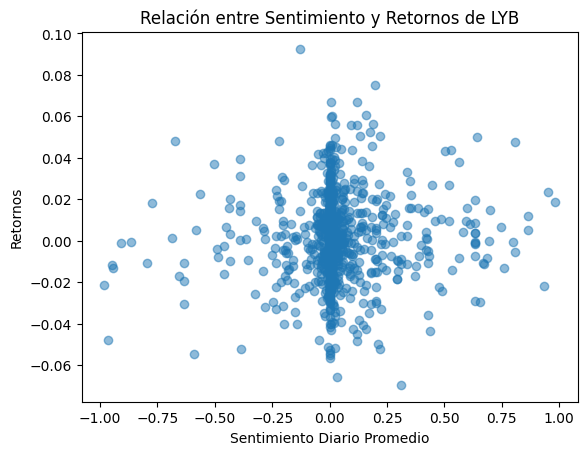

In [778]:
plt.scatter(combined_data_LYB['LYB UN Equity Twitter Sentiment Daily Average'], combined_data_LYB['LYB'], alpha=0.5)
plt.xlabel('Sentimiento Diario Promedio')
plt.ylabel('Retornos')
plt.title('Relación entre Sentimiento y Retornos de LYB')
plt.show()

In [779]:
# Mostrar el resumen del modelo para ver el R-cuadrado y otros estadísticos
print(model_LYB.summary())

# Calcular el RMSE
y_pred = model_LYB.predict(X_LYB)  # Realizar predicciones basadas en el modelo
rmse = np.sqrt(mean_squared_error(y_LYB, y_pred))
print(f"RMSE: {rmse}")


                            OLS Regression Results                            
Dep. Variable:                    LYB   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     75.87
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.23e-67
Time:                        17:56:48   Log-Likelihood:                 2726.1
No. Observations:                1022   AIC:                            -5440.
Df Residuals:                    1016   BIC:                            -5411.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [780]:
# Mostrar solo los p-valores de los coeficientes
print("P-values of the model coefficients:")
print(model_LYB.pvalues)

# Mostrar los intervalos de confianza de los coeficientes
print("Confidence intervals of the coefficients:")
print(model_LYB.conf_int())


P-values of the model coefficients:
const                                            5.439654e-01
SPY                                              2.416939e-70
LYB UN Equity Twitter Sentiment Daily Average    1.555917e-02
gdp                                              3.906976e-01
cpi                                              1.761859e-01
unemployment_rate                                9.323850e-01
dtype: float64
Confidence intervals of the coefficients:
                                                      0         1
const                                         -0.007355  0.013944
SPY                                            0.888807  1.091158
LYB UN Equity Twitter Sentiment Daily Average  0.001200  0.011421
gdp                                           -0.069532  0.027201
cpi                                           -0.123787  0.022727
unemployment_rate                             -0.157914  0.172191


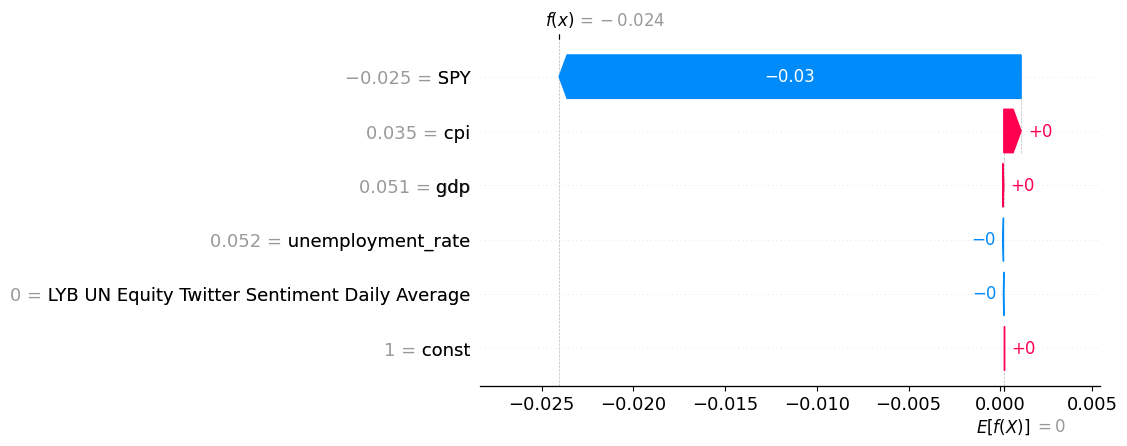

In [781]:
import shap
import numpy as np

# Supongamos que 'model' es tu modelo entrenado con statsmodels
def model_predict(data):
    # Asume que 'data' es un DataFrame similar a X
    # model.predict requiere un DataFrame con las mismas columnas que el modelo fue entrenado
    return model_LYB.predict(data).values

# Crear el objeto Explainer usando la función envoltorio
explainer = shap.Explainer(model_predict, X_LYB)

# Calcular los valores SHAP
shap_values = explainer(X_LYB)

# Visualizar la importancia de las características para una instancia específica
shap.plots.waterfall(shap_values[0])


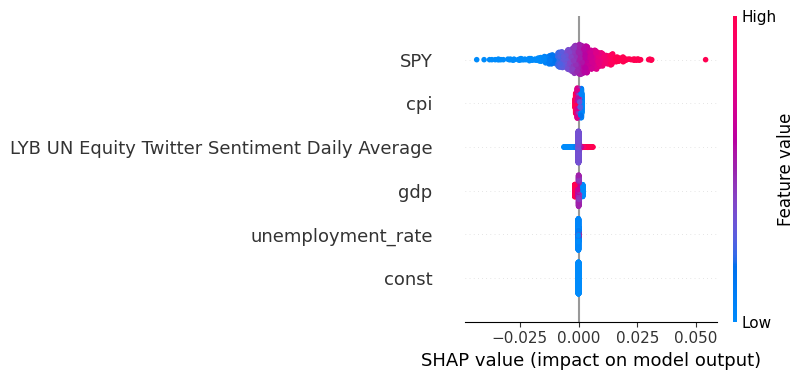

AttributeError: 'NoneType' object has no attribute 'shape'

In [782]:
# Gráfico de resumen de SHAP
shap.summary_plot(shap_values, X_LYB)

# Gráfico de dependencia para una característica específica
shap.dependence_plot( shap_values, X_LYB)


# 2. AXP

In [ ]:

start_date = returns.index.min()
end_date = returns.index.max()
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Reindexar los DataFrames
AXP_sent = AXP_sent.reindex(date_range, method='ffill')  # Usamos forward fill para llenar los datos faltantes
economics = economics.reindex(date_range, method='ffill')

# Comprobando los resultados
print(returns.head())
print(AXP_sent.head())
print(economics.head())

Ticker          ABBV      AVGO       AXP        BA       CAT       CMG  \
Date                                                                     
2019-05-02 -0.005323 -0.009658  0.001965 -0.002654 -0.021571  0.028044   
2019-05-03  0.003058 -0.000349  0.017910  0.001756  0.028778  0.002331   
2019-05-06  0.006988 -0.013113 -0.000084 -0.012910 -0.016539  0.010077   
2019-05-07 -0.016528 -0.013737 -0.009385 -0.038671 -0.022594 -0.014163   
2019-05-08  0.000513 -0.012691 -0.006175  0.007054 -0.012868  0.004317   

Ticker           CVX       JPM        KO       LYB      NVDA       SPY  \
Date                                                                     
2019-05-02 -0.012138  0.002171 -0.004116 -0.005898  0.015072 -0.002159   
2019-05-03  0.007647  0.006152  0.006820  0.012331 -0.000983  0.009788   
2019-05-06  0.009636 -0.008870 -0.005131 -0.020800 -0.017267 -0.004115   
2019-05-07 -0.001098 -0.016335 -0.009697 -0.023002 -0.037476 -0.016699   
2019-05-08 -0.006510 -0.005300 -0.003

In [ ]:
combined_data_AXP = pd.concat([AXP_sent, returns['AXP'], returns['SPY'],economics['gdp'], economics['cpi'], economics['unemployment_rate']], axis=1).dropna()

In [ ]:
import statsmodels.api as sm

X_AXP = combined_data_AXP[['SPY', 'AXP UN Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_AXP = combined_data_AXP['AXP']  

X_AXP = sm.add_constant(X_AXP)


model_AXP = sm.OLS(y_AXP, X_AXP).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     VZ   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     67.81
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.59e-62
Time:                        15:41:16   Log-Likelihood:                 3668.4
No. Observations:                1209   AIC:                            -7325.
Df Residuals:                    1203   BIC:                            -7294.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_AXP, y_AXP, test_size=0.2, random_state=42)

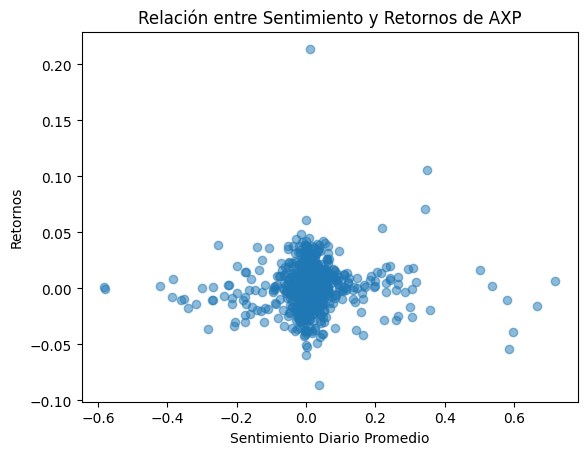

In [ ]:
plt.scatter(combined_data_AXP['AXP UN Equity Twitter Sentiment Daily Average'], combined_data_AXP['AXP'], alpha=0.5)
plt.xlabel('Sentimiento Diario Promedio')
plt.ylabel('Retornos')
plt.title('Relación entre Sentimiento y Retornos de AXP')
plt.show()

In [ ]:
y_pred = model_AXP.predict(X_AXP)  # Realizar predicciones basadas en el modelo
rmse = np.sqrt(mean_squared_error(y_AXP, y_pred))
print(f"RMSE: {rmse}")

RMSE: 0.014182394831482049


In [ ]:
# Mostrar solo los p-valores de los coeficientes
print("P-values of the model coefficients:")
print(model_AXP.pvalues)

# Mostrar los intervalos de confianza de los coeficientes
print("Confidence intervals of the coefficients:")
print(model_AXP.conf_int())


P-values of the model coefficients:
const                                             8.495918e-01
SPY                                              6.639355e-117
AXP UN Equity Twitter Sentiment Daily Average     2.804928e-02
gdp                                               7.502811e-01
cpi                                               7.329043e-01
unemployment_rate                                 6.680831e-01
dtype: float64
Confidence intervals of the coefficients:
                                                      0         1
const                                         -0.009866  0.008127
SPY                                            1.060901  1.231761
AXP UN Equity Twitter Sentiment Daily Average  0.001143  0.020041
gdp                                           -0.047507  0.034244
cpi                                           -0.072621  0.051099
unemployment_rate                             -0.108873  0.169779


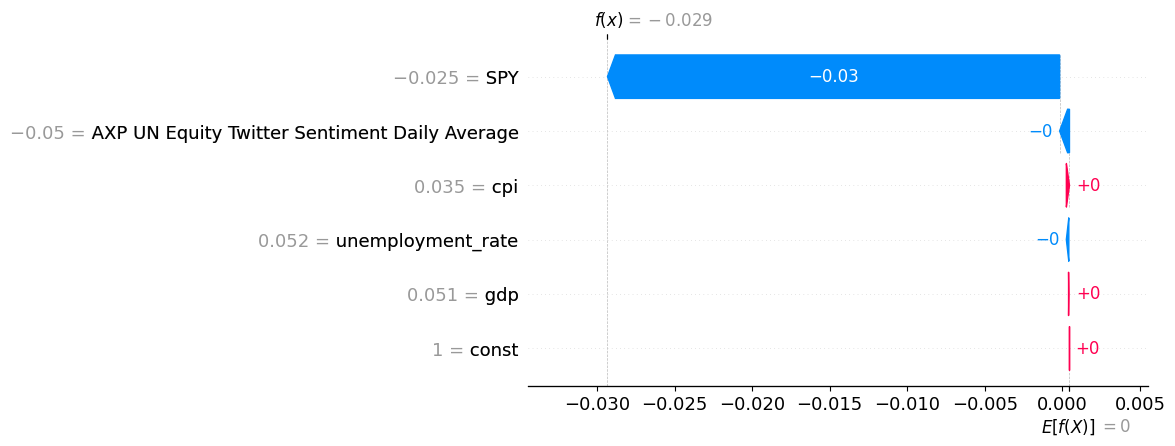

In [ ]:
import shap
import numpy as np


def model_predict(data):
  
    return model_AXP.predict(data).values


explainer = shap.Explainer(model_predict, X_AXP)


shap_values = explainer(X_AXP)


shap.plots.waterfall(shap_values[0])



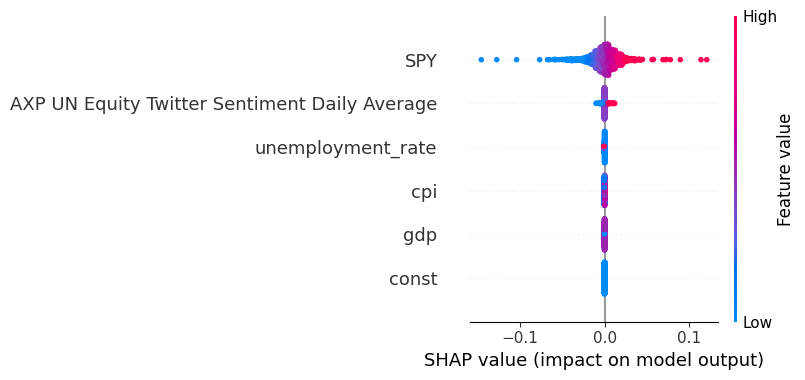

ValueError: Could not find feature named: Feature Name

In [ ]:
# Gráfico de resumen de SHAP
shap.summary_plot(shap_values, X_AXP)

# Gráfico de dependencia para una característica específica
shap.dependence_plot('Feature Name', shap_values, X_AXP)


# 3. AVGO

In [ ]:
start_date = returns.index.min()
end_date = returns.index.max()
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Reindexar los DataFrames
AVGO_sent = AVGO_sent.reindex(date_range, method='ffill')  # Usamos forward fill para llenar los datos faltantes
economics = economics.reindex(date_range, method='ffill')

# Comprobando los resultados
print(returns.head())
print(AVGO_sent.head())
print(economics.head())

Ticker          ABBV      AVGO       AXP        BA       CAT       CMG  \
Date                                                                     
2019-05-02 -0.005323 -0.009658  0.001965 -0.002654 -0.021571  0.028044   
2019-05-03  0.003058 -0.000349  0.017910  0.001756  0.028778  0.002331   
2019-05-06  0.006988 -0.013113 -0.000084 -0.012910 -0.016539  0.010077   
2019-05-07 -0.016528 -0.013737 -0.009385 -0.038671 -0.022594 -0.014163   
2019-05-08  0.000513 -0.012691 -0.006175  0.007054 -0.012868  0.004317   

Ticker           CVX       JPM        KO       LYB      NVDA       SPY  \
Date                                                                     
2019-05-02 -0.012138  0.002171 -0.004116 -0.005898  0.015072 -0.002159   
2019-05-03  0.007647  0.006152  0.006820  0.012331 -0.000983  0.009788   
2019-05-06  0.009636 -0.008870 -0.005131 -0.020800 -0.017267 -0.004115   
2019-05-07 -0.001098 -0.016335 -0.009697 -0.023002 -0.037476 -0.016699   
2019-05-08 -0.006510 -0.005300 -0.003

In [ ]:
combined_data_AVGO = pd.concat([AVGO_sent, returns['AVGO'], returns['SPY'],economics['gdp'], economics['cpi'], economics['unemployment_rate']], axis=1).dropna()

In [ ]:

X_AVGO = combined_data_AVGO[['SPY', 'AVGO UW Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_AVGO = combined_data_AVGO['AVGO']  

X_AVGO = sm.add_constant(X_AVGO)


model_AVGO = sm.OLS(y_AVGO, X_AVGO).fit()

print(model_AVGO.summary())

                            OLS Regression Results                            
Dep. Variable:                   AVGO   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     204.0
Date:                Thu, 30 May 2024   Prob (F-statistic):          1.32e-150
Time:                        15:51:49   Log-Likelihood:                 2917.6
No. Observations:                1022   AIC:                            -5823.
Df Residuals:                    1016   BIC:                            -5794.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

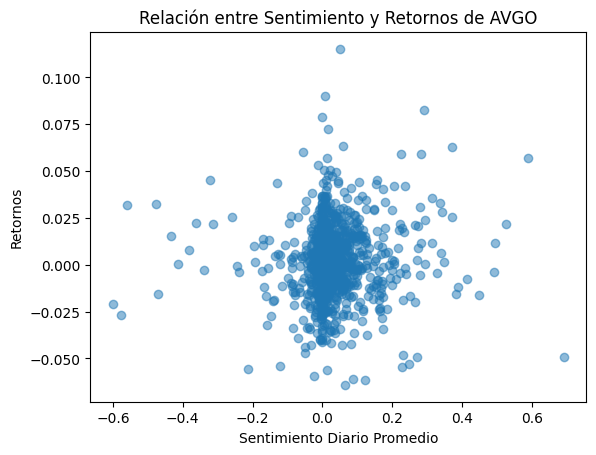

In [ ]:
plt.scatter(combined_data_AVGO['AVGO UW Equity Twitter Sentiment Daily Average'], combined_data_AVGO['AVGO'], alpha=0.5)
plt.xlabel('Sentimiento Diario Promedio')
plt.ylabel('Retornos')
plt.title('Relación entre Sentimiento y Retornos de AVGO')
plt.show()

In [849]:
y_pred = model_AVGO.predict(X_AVGO)  # Realizar predicciones basadas en el modelo
rms_AXGO = np.sqrt(mean_squared_error(y_AVGO, y_pred))
print(f"RMSE: {rms_AXGO}")

RMSE: 0.013929054869202888


In [ ]:
# Mostrar solo los p-valores de los coeficientes
print("P-values of the model coefficients:")
print(model_AVGO.pvalues)

# Mostrar los intervalos de confianza de los coeficientes
print("Confidence intervals of the coefficients:")
print(model_AVGO.conf_int())

P-values of the model coefficients:
const                                              4.514500e-01
SPY                                               5.733926e-154
AVGO UW Equity Twitter Sentiment Daily Average     1.003140e-01
gdp                                                3.998662e-01
cpi                                                6.743997e-01
unemployment_rate                                  2.741430e-01
dtype: float64
Confidence intervals of the coefficients:
                                                       0         1
const                                          -0.005444  0.012228
SPY                                             1.272671  1.440567
AVGO UW Equity Twitter Sentiment Daily Average -0.001371  0.015574
gdp                                            -0.022892  0.057318
cpi                                            -0.047724  0.073735
unemployment_rate                              -0.213652  0.060684


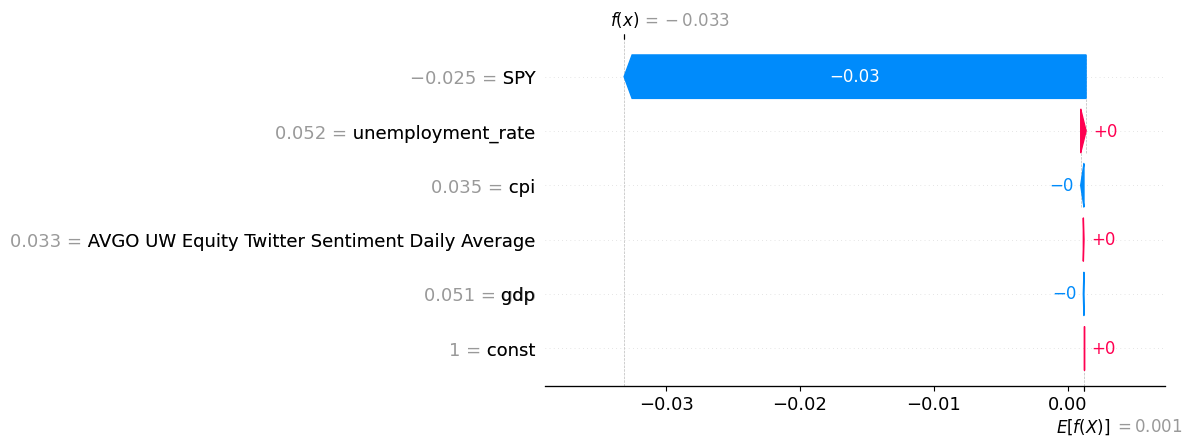

In [783]:

def model_predict(data):
    return model_AVGO.predict(data).values

# Crear el objeto Explainer usando la función envoltorio
explainer = shap.Explainer(model_predict, X_AVGO)

# Calcular los valores SHAP
shap_values = explainer(X_AVGO)

# Visualizar la importancia de las características para una instancia específica
shap.plots.waterfall(shap_values[0])

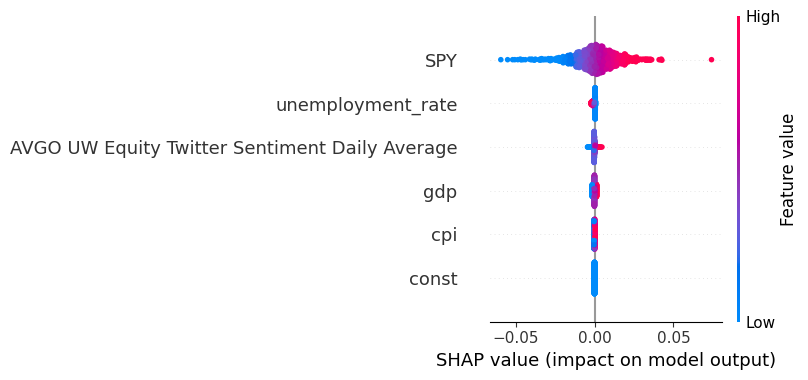

ValueError: Could not find feature named: Feature Name

In [784]:
shap.summary_plot(shap_values, X_AVGO)

shap.dependence_plot('Feature Name', shap_values, X_AVGO)

# BA SENT

In [ ]:
start_date = returns.index.min()
end_date = returns.index.max()
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Reindexar los DataFrames
BA_sent = BA_sent.reindex(date_range, method='ffill')  # Usamos forward fill para llenar los datos faltantes
economics = economics.reindex(date_range, method='ffill')


In [ ]:
combined_data_BA = pd.concat([BA_sent, returns['BA'], returns['SPY'],economics['gdp'], economics['cpi'], economics['unemployment_rate']], axis=1).dropna()

In [ ]:
X_BA = combined_data_BA[['SPY', 'BA UN Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_BA = combined_data_BA['BA']  

X_BA = sm.add_constant(X_BA)


model_BA = sm.OLS(y_BA, X_BA).fit()

print(model_BA.summary())

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     79.66
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.38e-70
Time:                        15:55:49   Log-Likelihood:                 2540.5
No. Observations:                1022   AIC:                            -5069.
Df Residuals:                    1016   BIC:                            -5039.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

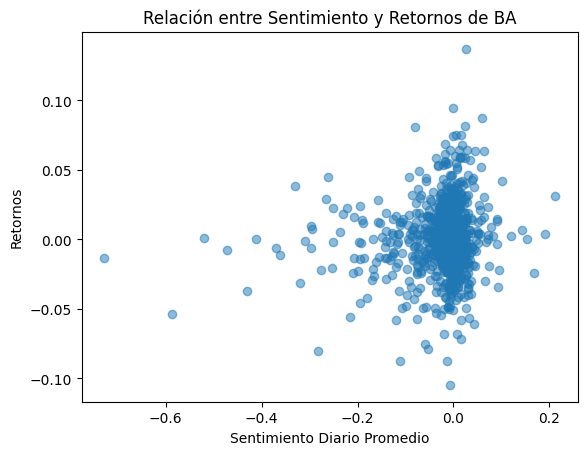

In [ ]:
plt.scatter(combined_data_BA['BA UN Equity Twitter Sentiment Daily Average'], combined_data_BA['BA'], alpha=0.5)
plt.xlabel('Sentimiento Diario Promedio')
plt.ylabel('Retornos')
plt.title('Relación entre Sentimiento y Retornos de BA')
plt.show()

In [ ]:
y_pred = model_BA.predict(X_BA)  # Realizar predicciones basadas en el modelo
rmse_BA = np.sqrt(mean_squared_error(y_BA, y_pred))
print(f"RMSE: {rmse_BA}")

RMSE: 0.020146958620524135


In [ ]:
# Mostrar solo los p-valores de los coeficientes
print("P-values of the model coefficients:")
print(model_BA.pvalues)

# Mostrar los intervalos de confianza de los coeficientes
print("Confidence intervals of the coefficients:")
print(model_BA.conf_int())

P-values of the model coefficients:
const                                           2.336405e-01
SPY                                             1.558222e-71
BA UN Equity Twitter Sentiment Daily Average    2.550142e-05
gdp                                             9.400685e-01
cpi                                             4.886664e-01
unemployment_rate                               3.017691e-01
dtype: float64
Confidence intervals of the coefficients:
                                                     0         1
const                                        -0.005112  0.020925
SPY                                           1.077951  1.320639
BA UN Equity Twitter Sentiment Daily Average  0.020819  0.056853
gdp                                          -0.055834  0.060284
cpi                                          -0.120921  0.057825
unemployment_rate                            -0.303571  0.094161


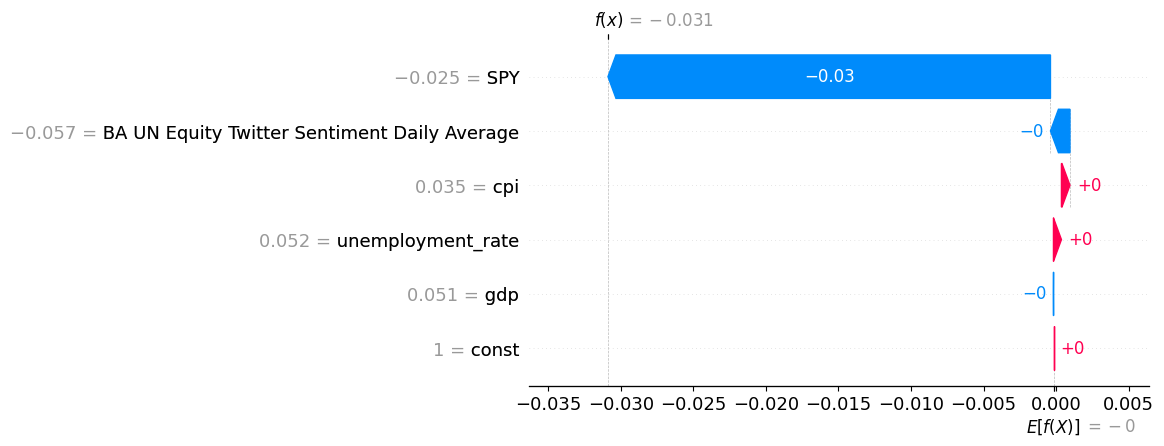

In [785]:

def model_predict(data):
    return model_BA.predict(data).values

# Crear el objeto Explainer usando la función envoltorio
explainer = shap.Explainer(model_predict, X_BA)

# Calcular los valores SHAP
shap_values = explainer(X_BA)

# Visualizar la importancia de las características para una instancia específica
shap.plots.waterfall(shap_values[0])

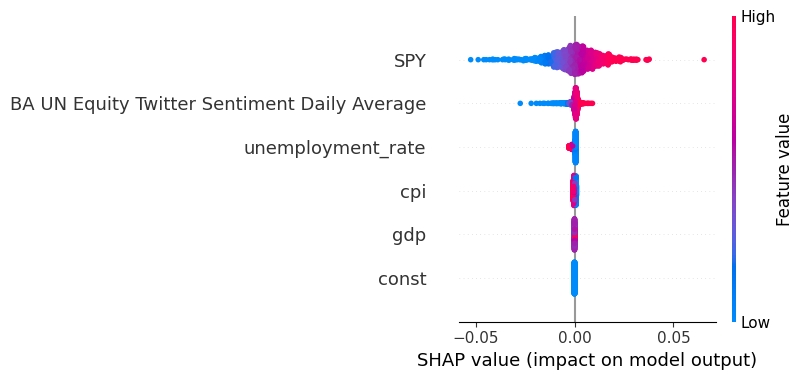

ValueError: Could not find feature named: Feature Name

In [786]:

shap.summary_plot(shap_values, X_BA)

shap.dependence_plot('Feature Name', shap_values, X_BA)

# VZ

In [ ]:
VZ_sent = VZ_sent.reindex(date_range, method='ffill')

In [ ]:
combined_data_VZ = pd.concat([VZ_sent, returns['VZ'], returns['SPY'],economics['gdp'], economics['cpi'], economics['unemployment_rate']], axis=1).dropna()

In [ ]:
X_VZ = combined_data_VZ[['SPY', 'VZ UN Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_VZ = combined_data_VZ['VZ']  

X_VZ = sm.add_constant(X_VZ)


model_VZ = sm.OLS(y_VZ, X_VZ).fit()

print(model_VZ.summary())

                            OLS Regression Results                            
Dep. Variable:                     VZ   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     27.18
Date:                Thu, 30 May 2024   Prob (F-statistic):           7.21e-26
Time:                        16:07:19   Log-Likelihood:                 3124.3
No. Observations:                1022   AIC:                            -6237.
Df Residuals:                    1016   BIC:                            -6207.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

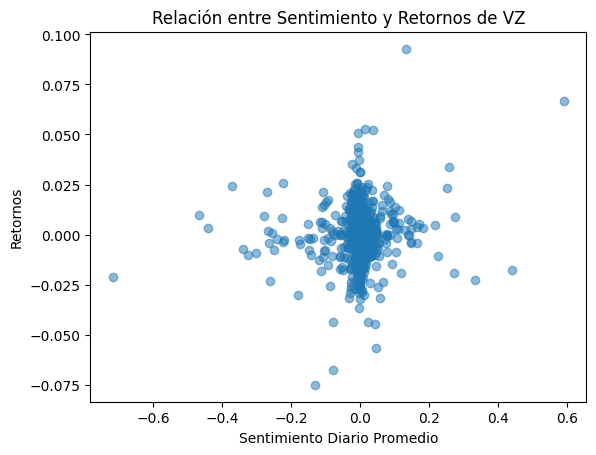

In [ ]:
plt.scatter(combined_data_VZ['VZ UN Equity Twitter Sentiment Daily Average'], combined_data_VZ['VZ'], alpha=0.5)
plt.xlabel('Sentimiento Diario Promedio')
plt.ylabel('Retornos')
plt.title('Relación entre Sentimiento y Retornos de VZ')
plt.show()

In [850]:
y_pred = model_VZ.predict(X_VZ)  # Realizar predicciones basadas en el modelo
rmse_VZ = np.sqrt(mean_squared_error(y_VZ, y_pred))
print(f"RMSE: {rmse_VZ}")

RMSE: 0.011378609400351545


In [ ]:
# Mostrar solo los p-valores de los coeficientes
print("P-values of the model coefficients:")
print(model_VZ.pvalues)

# Mostrar los intervalos de confianza de los coeficientes
print("Confidence intervals of the coefficients:")
print(model_VZ.conf_int())

P-values of the model coefficients:
const                                           2.976127e-01
SPY                                             2.035297e-26
VZ UN Equity Twitter Sentiment Daily Average    1.351523e-04
gdp                                             3.665825e-01
cpi                                             1.098880e-01
unemployment_rate                               7.353002e-01
dtype: float64
Confidence intervals of the coefficients:
                                                     0         1
const                                        -0.003395  0.011084
SPY                                           0.313649  0.450739
VZ UN Equity Twitter Sentiment Daily Average  0.010179  0.031551
gdp                                          -0.047854  0.017685
cpi                                          -0.090056  0.009156
unemployment_rate                            -0.131602  0.092911


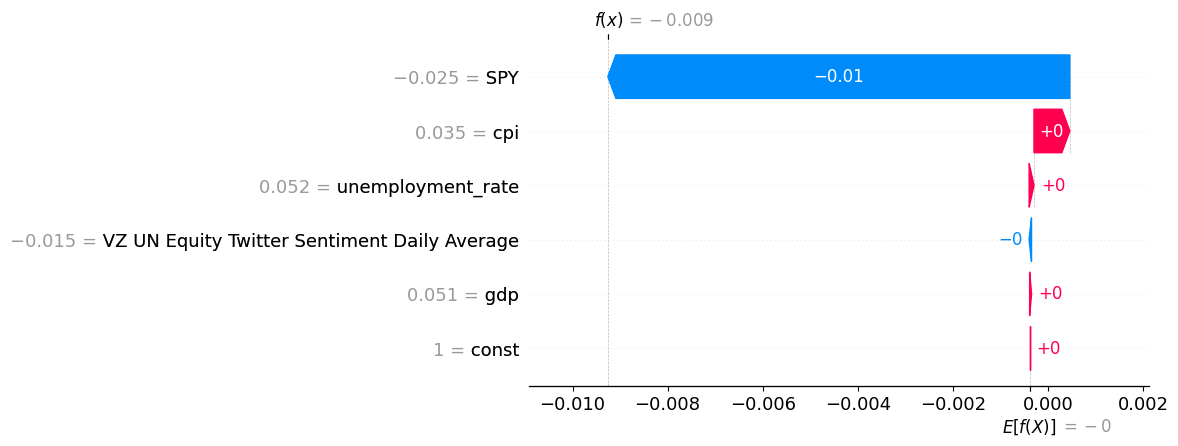

In [787]:

def model_predict(data):
    return model_VZ.predict(data).values

# Crear el objeto Explainer usando la función envoltorio
explainer = shap.Explainer(model_predict, X_VZ)

# Calcular los valores SHAP
shap_values = explainer(X_VZ)

# Visualizar la importancia de las características para una instancia específica
shap.plots.waterfall(shap_values[0])

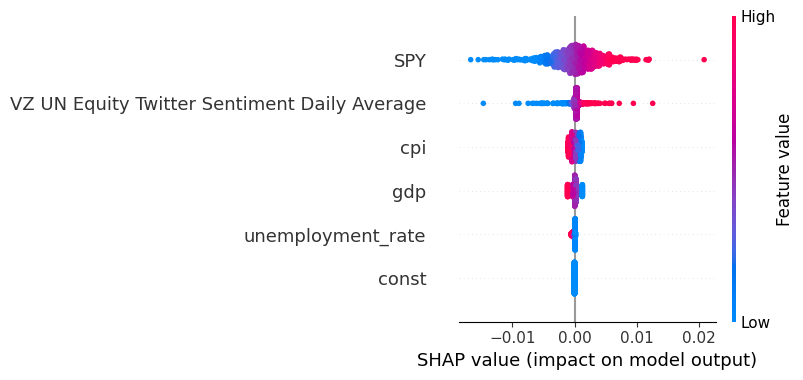

ValueError: Could not find feature named: Feature Name

In [788]:

shap.summary_plot(shap_values, X_VZ)

shap.dependence_plot('Feature Name', shap_values, X_VZ)

# ABBV

In [ ]:
ABBV_sent = ABBV_sent.reindex(date_range, method='ffill')

In [ ]:
combined_data_ABBV = pd.concat([ABBV_sent, returns['ABBV'], returns['SPY'],economics['gdp'], economics['cpi'], economics['unemployment_rate']], axis=1).dropna()

In [ ]:
X_ABBV = combined_data_ABBV[['SPY', 'ABBV UN Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_ABBV = combined_data_ABBV['ABBV']  

X_ABBV = sm.add_constant(X_ABBV)


model_ABBV = sm.OLS(y_ABBV, X_ABBV).fit()

print(model_ABBV.summary())

                            OLS Regression Results                            
Dep. Variable:                   ABBV   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     25.95
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.03e-24
Time:                        16:10:22   Log-Likelihood:                 2955.2
No. Observations:                1022   AIC:                            -5898.
Df Residuals:                    1016   BIC:                            -5869.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

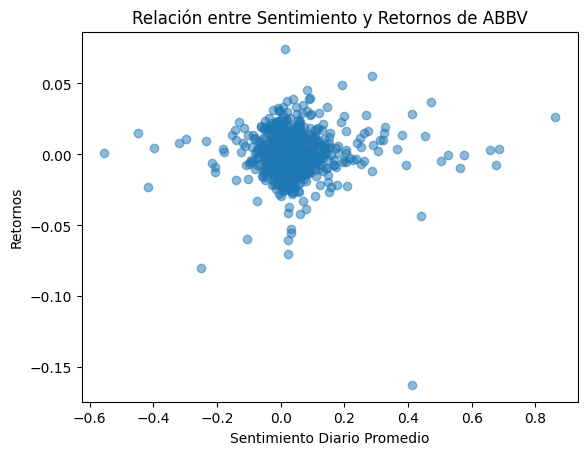

In [ ]:
plt.scatter(combined_data_ABBV['ABBV UN Equity Twitter Sentiment Daily Average'], combined_data_ABBV['ABBV'], alpha=0.5)
plt.xlabel('Sentimiento Diario Promedio')
plt.ylabel('Retornos')
plt.title('Relación entre Sentimiento y Retornos de ABBV')
plt.show()

In [851]:
y_pred = model_ABBV.predict(X_ABBV)  # Realizar predicciones basadas en el modelo
rmse_ABBV = np.sqrt(mean_squared_error(y_ABBV, y_pred))
print(f"RMSE: {rmse_ABBV}")

RMSE: 0.013426430472374485


In [ ]:
# Mostrar solo los p-valores de los coeficientes
print("P-values of the model coefficients:")
print(model_ABBV.pvalues)

# Mostrar los intervalos de confianza de los coeficientes
print("Confidence intervals of the coefficients:")
print(model_ABBV.conf_int())

P-values of the model coefficients:
const                                             4.955238e-01
SPY                                               3.473671e-28
ABBV UN Equity Twitter Sentiment Daily Average    5.517591e-01
gdp                                               7.025134e-01
cpi                                               6.946499e-01
unemployment_rate                                 6.838138e-01
dtype: float64
Confidence intervals of the coefficients:
                                                       0         1
const                                          -0.005556  0.011473
SPY                                             0.386750  0.548466
ABBV UN Equity Twitter Sentiment Daily Average -0.005959  0.011150
gdp                                            -0.046182  0.031130
cpi                                            -0.070255  0.046826
unemployment_rate                              -0.159300  0.104528


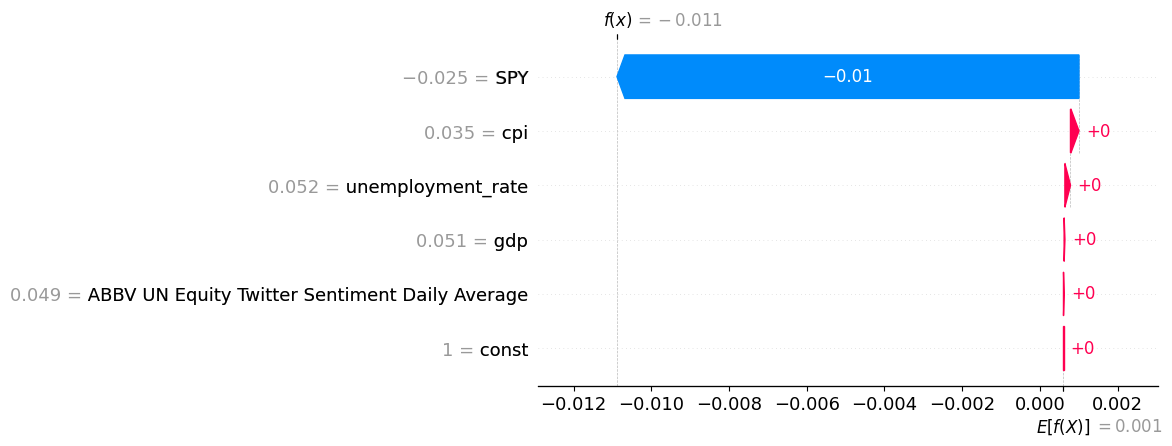

In [789]:

def model_predict(data):
    return model_ABBV.predict(data).values

# Crear el objeto Explainer usando la función envoltorio
explainer = shap.Explainer(model_predict, X_ABBV)

# Calcular los valores SHAP
shap_values = explainer(X_ABBV)

# Visualizar la importancia de las características para una instancia específica
shap.plots.waterfall(shap_values[0])

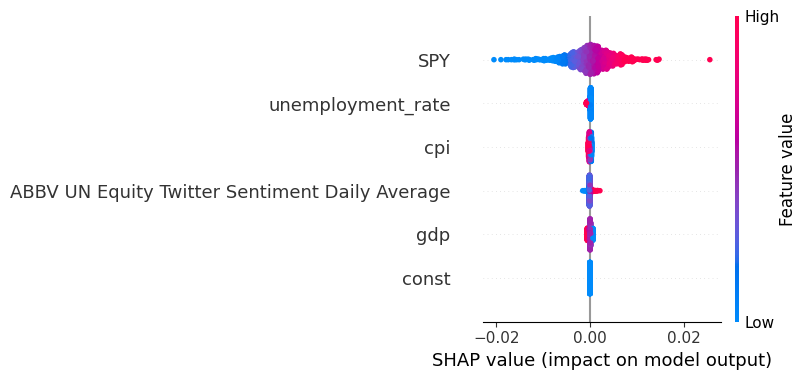

ValueError: Could not find feature named: Feature Name

In [790]:

shap.summary_plot(shap_values, X_ABBV)

shap.dependence_plot('Feature Name', shap_values, X_ABBV)

# CAT

In [ ]:
CAT_sent = CAT_sent.reindex(date_range, method='ffill')

In [ ]:
combined_data_CAT = pd.concat([CAT_sent, returns['CAT'], returns['SPY'],economics['gdp'], economics['cpi'], economics['unemployment_rate']], axis=1).dropna()

In [ ]:
X_CAT = combined_data_CAT[['SPY', 'CAT UN Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_CAT = combined_data_CAT['CAT']  

X_CAT = sm.add_constant(X_CAT)


model_CAT = sm.OLS(y_CAT, X_CAT).fit()

print(model_CAT.summary())

                            OLS Regression Results                            
Dep. Variable:                    CAT   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     164.2
Date:                Thu, 30 May 2024   Prob (F-statistic):          3.41e-133
Time:                        16:18:42   Log-Likelihood:                 3299.8
No. Observations:                1209   AIC:                            -6588.
Df Residuals:                    1203   BIC:                            -6557.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

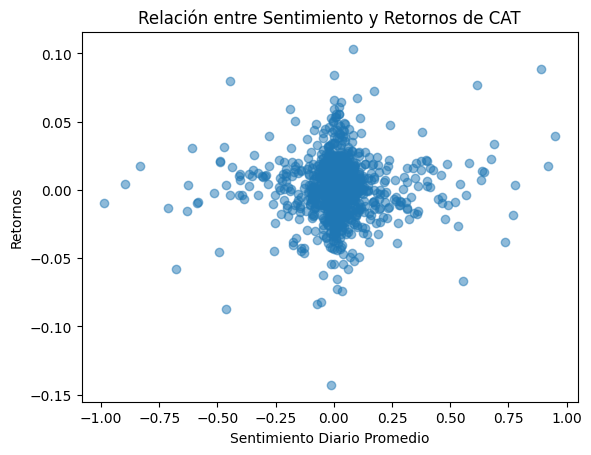

In [ ]:
plt.scatter(combined_data_CAT['CAT UN Equity Twitter Sentiment Daily Average'], combined_data_CAT['CAT'], alpha=0.5)
plt.xlabel('Sentimiento Diario Promedio')
plt.ylabel('Retornos')
plt.title('Relación entre Sentimiento y Retornos de CAT')
plt.show()

In [ ]:
y_pred = model_CAT.predict(X_CAT)  # Realizar predicciones basadas en el modelo
rmse_CAT = np.sqrt(mean_squared_error(y_CAT, y_pred))
print(f"RMSE: {rmse_CAT}")

RMSE: 0.015790607918747916


In [ ]:
# Mostrar solo los p-valores de los coeficientes
print("P-values of the model coefficients:")
print(model_CAT.pvalues)

# Mostrar los intervalos de confianza de los coeficientes
print("Confidence intervals of the coefficients:")
print(model_CAT.conf_int())

P-values of the model coefficients:
const                                             3.187575e-01
SPY                                              3.571147e-137
CAT UN Equity Twitter Sentiment Daily Average     5.241857e-03
gdp                                               7.185090e-01
cpi                                               4.589302e-01
unemployment_rate                                 4.285855e-01
dtype: float64
Confidence intervals of the coefficients:
                                                      0         1
const                                         -0.001743  0.005347
SPY                                            0.905860  1.039641
CAT UN Equity Twitter Sentiment Daily Average  0.002438  0.013898
gdp                                           -0.000071  0.000104
cpi                                           -0.000555  0.000251
unemployment_rate                             -0.000627  0.000266


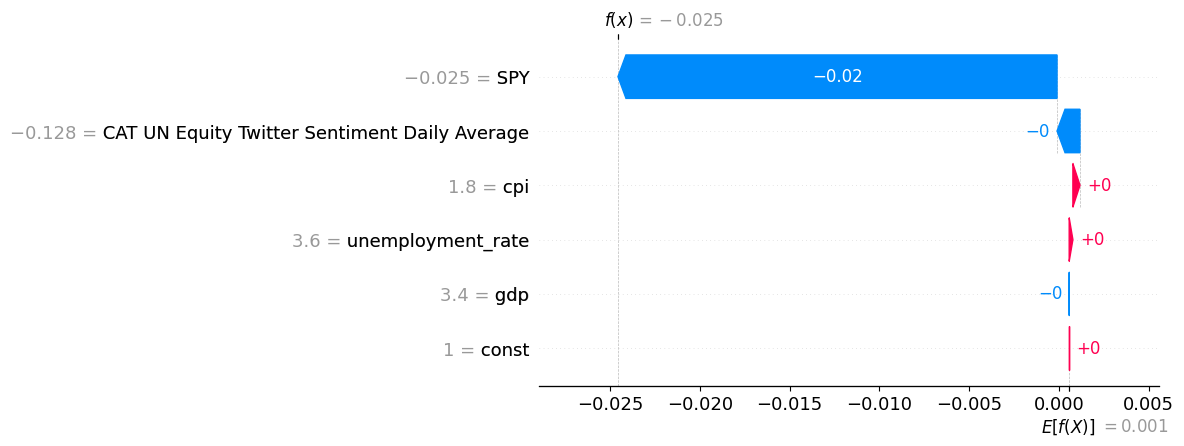

In [791]:

def model_predict(data):
    return model_CAT.predict(data).values

# Crear el objeto Explainer usando la función envoltorio
explainer = shap.Explainer(model_predict, X_CAT)

# Calcular los valores SHAP
shap_values = explainer(X_CAT)

# Visualizar la importancia de las características para una instancia específica
shap.plots.waterfall(shap_values[0])

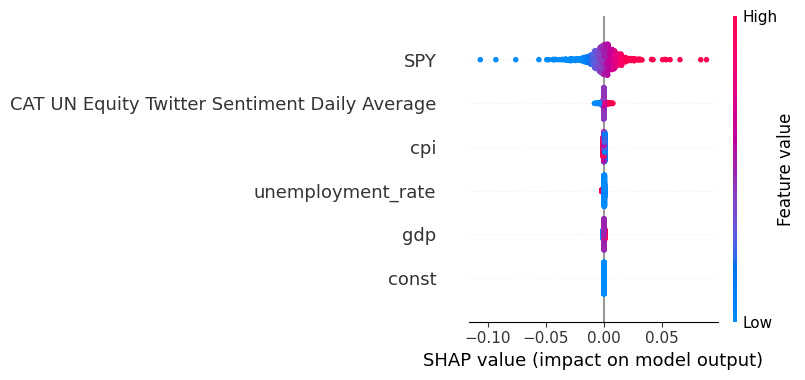

ValueError: Could not find feature named: Feature Name

In [792]:

shap.summary_plot(shap_values, X_CAT)

shap.dependence_plot('Feature Name', shap_values, X_CAT)

# JPM

In [ ]:
JPM_sent = JPM_sent.reindex(date_range, method='ffill')

In [ ]:
combined_data_JPM = pd.concat([JPM_sent, returns['JPM'], returns['SPY'],economics['gdp'], economics['cpi'], economics['unemployment_rate']], axis=1).dropna()

In [ ]:
X_JPM = combined_data_JPM[['SPY', 'JPM UN Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_JPM = combined_data_JPM['JPM']  

X_JPM = sm.add_constant(X_JPM)


model_JPM = sm.OLS(y_JPM, X_JPM).fit()

print(model_JPM.summary())

                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     115.6
Date:                Thu, 30 May 2024   Prob (F-statistic):           8.27e-97
Time:                        16:19:10   Log-Likelihood:                 3066.5
No. Observations:                1022   AIC:                            -6121.
Df Residuals:                    1016   BIC:                            -6091.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

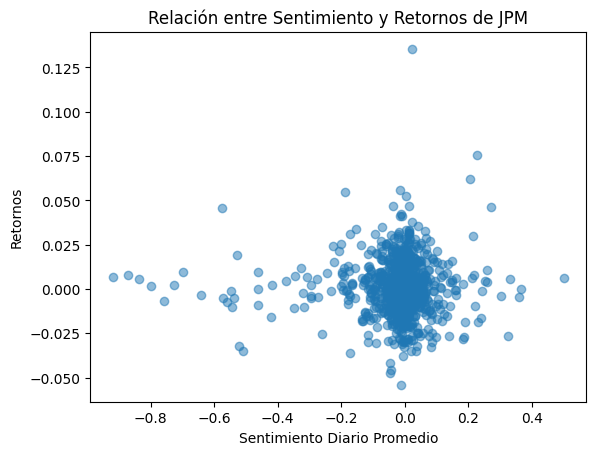

In [ ]:
plt.scatter(combined_data_JPM['JPM UN Equity Twitter Sentiment Daily Average'], combined_data_JPM['JPM'], alpha=0.5)
plt.xlabel('Sentimiento Diario Promedio')
plt.ylabel('Retornos')
plt.title('Relación entre Sentimiento y Retornos de JPM')
plt.show()

In [ ]:
y_pred = model_JPM.predict(X_JPM)  # Realizar predicciones basadas en el modelo
rmse_JPM = np.sqrt(mean_squared_error(y_JPM, y_pred))
print(f"RMSE: {rmse_JPM}")

RMSE: 0.013771101557065303


In [842]:
# Mostrar solo los p-valores de los coeficientes
print("P-values of the model coefficients:")
print(model_JPM.pvalues)

# Mostrar los intervalos de confianza de los coeficientes
print("Confidence intervals of the coefficients:")
print(model_JPM.conf_int())

P-values of the model coefficients:
const                                             3.379432e-01
SPY                                              1.576963e-100
JPM UN Equity Twitter Sentiment Daily Average     3.596929e-01
gdp                                               2.918741e-01
cpi                                               1.189283e-01
unemployment_rate                                 9.859522e-01
dtype: float64
Confidence intervals of the coefficients:
                                                      0         1
const                                         -0.003930  0.011438
SPY                                            0.811732  0.956947
JPM UN Equity Twitter Sentiment Daily Average -0.003437  0.009459
gdp                                           -0.053329  0.016046
cpi                                           -0.094558  0.010782
unemployment_rate                             -0.118606  0.120755


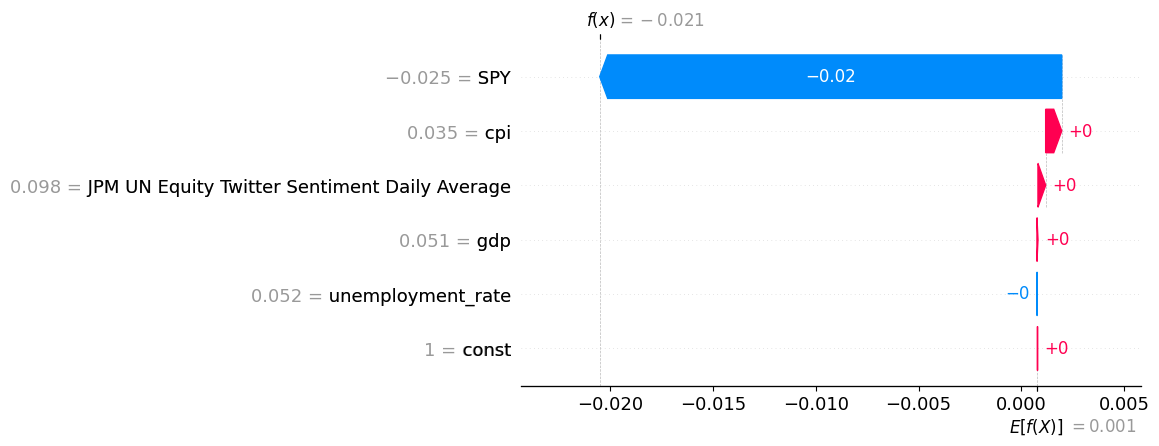

In [843]:

def model_predict(data):
    return model_JPM.predict(data).values

# Crear el objeto Explainer usando la función envoltorio
explainer = shap.Explainer(model_predict, X_JPM)

# Calcular los valores SHAP
shap_values = explainer(X_JPM)

# Visualizar la importancia de las características para una instancia específica
shap.plots.waterfall(shap_values[0])

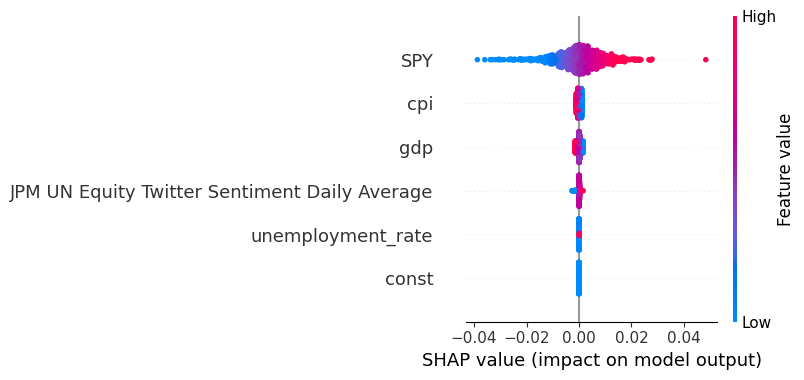

ValueError: Could not find feature named: Feature Name

In [844]:

shap.summary_plot(shap_values, X_JPM)

shap.dependence_plot('Feature Name', shap_values, X_JPM)

# CVX

In [ ]:
CVX_sent = CVX_sent.reindex(date_range, method='ffill')

In [ ]:
combined_data_CVX = pd.concat([CVX_sent, returns['CVX'], returns['SPY'],economics['gdp'], economics['cpi'], economics['unemployment_rate']], axis=1).dropna()

In [ ]:
X_CVX = combined_data_CVX[['SPY', 'CVX UN Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_CVX = combined_data_CVX['CVX']  

X_CVX = sm.add_constant(X_CVX)


model_CVX = sm.OLS(y_CVX, X_CVX).fit()

print(model_CVX.summary())

                            OLS Regression Results                            
Dep. Variable:                    CVX   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     143.1
Date:                Thu, 30 May 2024   Prob (F-statistic):          3.17e-119
Time:                        16:29:25   Log-Likelihood:                 3145.2
No. Observations:                1209   AIC:                            -6278.
Df Residuals:                    1203   BIC:                            -6248.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

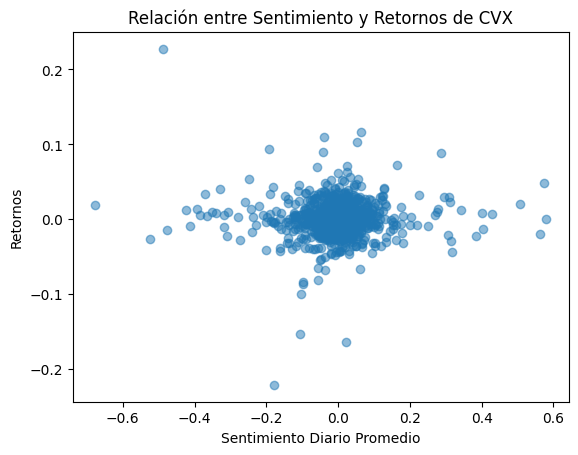

In [ ]:
plt.scatter(combined_data_CVX['CVX UN Equity Twitter Sentiment Daily Average'], combined_data_CVX['CVX'], alpha=0.5)
plt.xlabel('Sentimiento Diario Promedio')
plt.ylabel('Retornos')
plt.title('Relación entre Sentimiento y Retornos de CVX')
plt.show()

In [ ]:
y_pred = model_CVX.predict(X_CVX)  # Realizar predicciones basadas en el modelo
rmse_CVX = np.sqrt(mean_squared_error(y_CVX, y_pred))
print(f"RMSE: {rmse_CVX}")

RMSE: 0.017945203336694707


In [ ]:
# Mostrar solo los p-valores de los coeficientes
print("P-values of the model coefficients:")
print(model_CVX.pvalues)

# Mostrar los intervalos de confianza de los coeficientes
print("Confidence intervals of the coefficients:")
print(model_CVX.conf_int())

P-values of the model coefficients:
const                                             2.080933e-01
SPY                                              4.031738e-123
CVX UN Equity Twitter Sentiment Daily Average     5.916422e-01
gdp                                               1.594107e-01
cpi                                               6.046568e-02
unemployment_rate                                 4.578701e-01
dtype: float64
Confidence intervals of the coefficients:
                                                      0         1
const                                         -0.006627  0.001445
SPY                                            0.955038  1.107025
CVX UN Equity Twitter Sentiment Daily Average -0.008314  0.014574
gdp                                           -0.000170  0.000028
cpi                                           -0.000020  0.000908
unemployment_rate                             -0.000315  0.000699


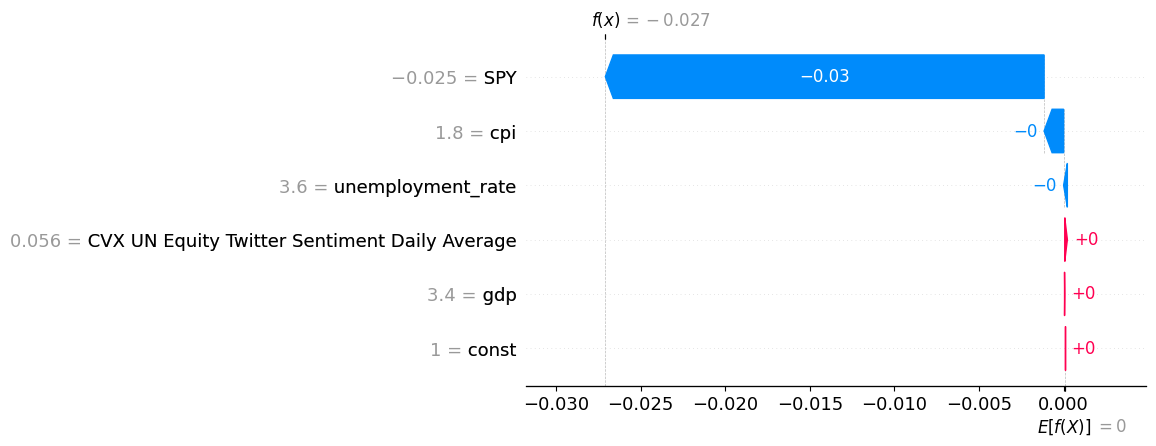

In [795]:

def model_predict(data):
    return model_CVX.predict(data).values

# Crear el objeto Explainer usando la función envoltorio
explainer = shap.Explainer(model_predict, X_CVX)

# Calcular los valores SHAP
shap_values = explainer(X_CVX)

# Visualizar la importancia de las características para una instancia específica
shap.plots.waterfall(shap_values[0])

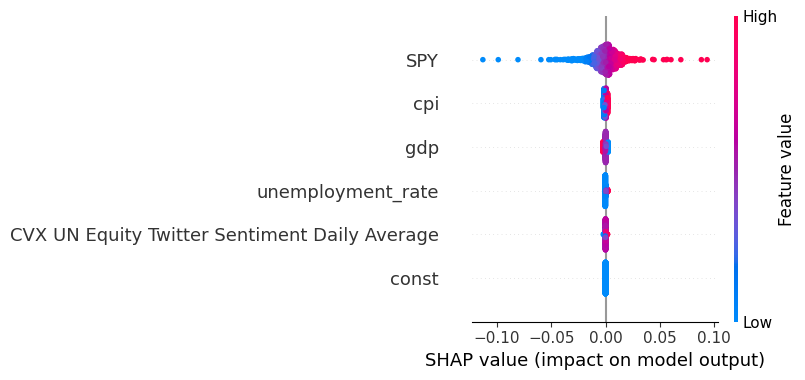

ValueError: Could not find feature named: Feature Name

In [794]:

shap.summary_plot(shap_values, X_CVX)

shap.dependence_plot('Feature Name', shap_values, X_CVX)

# KO

In [798]:
KO_sent = KO_sent.reindex(date_range, method='ffill')

In [799]:
combined_data_KO = pd.concat([KO_sent, returns['KO'], returns['SPY'],economics['gdp'], economics['cpi'], economics['unemployment_rate']], axis=1).dropna()

In [800]:
X_KO = combined_data_KO[['SPY', 'KO UN Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_KO = combined_data_KO['KO']  

X_KO = sm.add_constant(X_KO)


model_KO = sm.OLS(y_KO, X_KO).fit()

print(model_KO.summary())

                            OLS Regression Results                            
Dep. Variable:                     KO   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     74.83
Date:                Thu, 30 May 2024   Prob (F-statistic):           8.19e-67
Time:                        21:27:32   Log-Likelihood:                 3368.3
No. Observations:                1022   AIC:                            -6725.
Df Residuals:                    1016   BIC:                            -6695.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

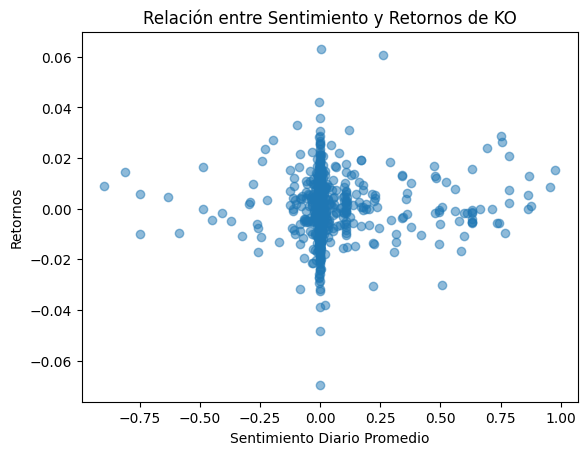

In [801]:
plt.scatter(combined_data_KO['KO UN Equity Twitter Sentiment Daily Average'], combined_data_KO['KO'], alpha=0.5)
plt.xlabel('Sentimiento Diario Promedio')
plt.ylabel('Retornos')
plt.title('Relación entre Sentimiento y Retornos de KO')
plt.show()

In [802]:
y_pred = model_KO.predict(X_KO)  # Realizar predicciones basadas en el modelo
rmse_KO = np.sqrt(mean_squared_error(y_KO, y_pred))
print(f"RMSE: {rmse_KO}")

RMSE: 0.0089618737634932


In [803]:
# Mostrar solo los p-valores de los coeficientes
print("P-values of the model coefficients:")
print(model_KO.pvalues)

# Mostrar los intervalos de confianza de los coeficientes
print("Confidence intervals of the coefficients:")
print(model_KO.conf_int())

P-values of the model coefficients:
const                                           5.282521e-01
SPY                                             1.400451e-70
KO UN Equity Twitter Sentiment Daily Average    3.578836e-03
gdp                                             5.142294e-01
cpi                                             8.548574e-01
unemployment_rate                               3.445727e-01
dtype: float64
Confidence intervals of the coefficients:
                                                     0         1
const                                        -0.007532  0.003867
SPY                                           0.476385  0.584600
KO UN Equity Twitter Sentiment Daily Average  0.001681  0.008572
gdp                                          -0.034428  0.017245
cpi                                          -0.042849  0.035540
unemployment_rate                            -0.045920  0.131340


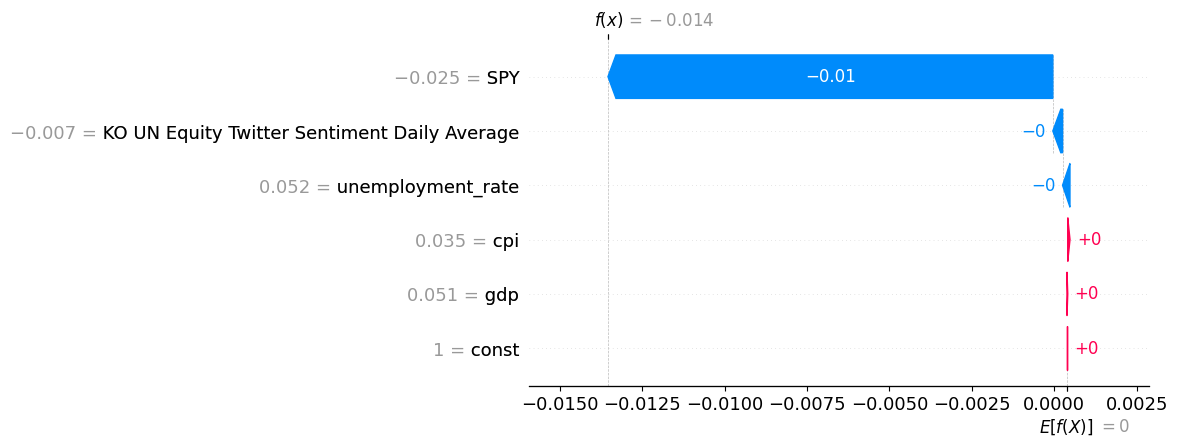

In [804]:

def model_predict(data):
    return model_KO.predict(data).values

# Crear el objeto Explainer usando la función envoltorio
explainer = shap.Explainer(model_predict, X_KO)

# Calcular los valores SHAP
shap_values = explainer(X_KO)

# Visualizar la importancia de las características para una instancia específica
shap.plots.waterfall(shap_values[0])

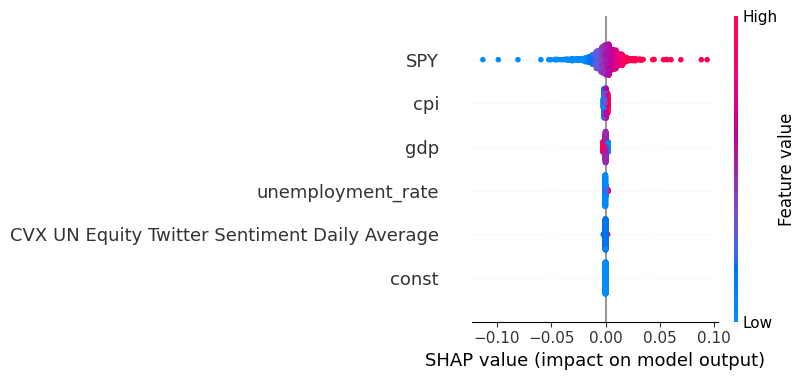

ValueError: Could not find feature named: Feature Name

In [797]:

shap.summary_plot(shap_values, X_KO)

shap.dependence_plot('Feature Name', shap_values, X_KO)

# CMG

In [805]:
CMG_sent = CMG_sent.reindex(date_range, method='ffill')

In [806]:
combined_data_CMG = pd.concat([CMG_sent, returns['CMG'], returns['SPY'],economics['gdp'], economics['cpi'], economics['unemployment_rate']], axis=1).dropna()

In [807]:
X_CMG = combined_data_CMG[['SPY', 'CMG US Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_CMG = combined_data_CMG['CMG']  

X_CMG = sm.add_constant(X_CMG)


model_CMG = sm.OLS(y_CMG, X_CMG).fit()

print(model_CMG.summary())

                            OLS Regression Results                            
Dep. Variable:                    CMG   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     96.77
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.86e-83
Time:                        21:27:48   Log-Likelihood:                 2820.8
No. Observations:                1022   AIC:                            -5630.
Df Residuals:                    1016   BIC:                            -5600.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

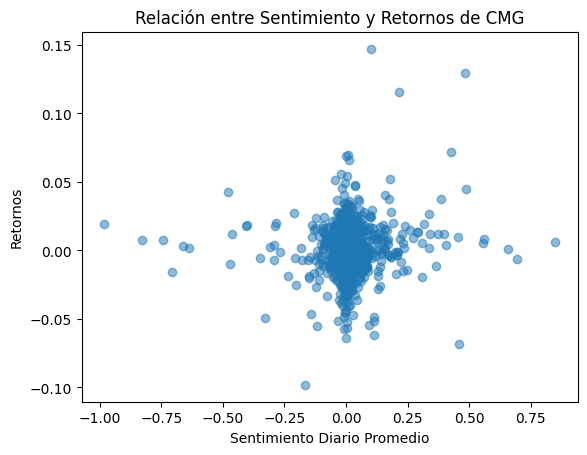

In [808]:
plt.scatter(combined_data_CMG['CMG US Equity Twitter Sentiment Daily Average'], combined_data_CMG['CMG'], alpha=0.5)
plt.xlabel('Sentimiento Diario Promedio')
plt.ylabel('Retornos')
plt.title('Relación entre Sentimiento y Retornos de CMG')
plt.show()

In [809]:
y_pred = model_CMG.predict(X_CMG)  # Realizar predicciones basadas en el modelo
rmse_CMG = np.sqrt(mean_squared_error(y_CMG, y_pred))
print(f"RMSE: {rmse_CMG}")

RMSE: 0.015313125260784762


In [810]:
# Mostrar solo los p-valores de los coeficientes
print("P-values of the model coefficients:")
print(model_CMG.pvalues)

# Mostrar los intervalos de confianza de los coeficientes
print("Confidence intervals of the coefficients:")
print(model_CMG.conf_int())

P-values of the model coefficients:
const                                            8.913050e-01
SPY                                              3.727191e-86
CMG US Equity Twitter Sentiment Daily Average    7.350512e-05
gdp                                              9.979679e-01
cpi                                              7.524513e-01
unemployment_rate                                8.462236e-01
dtype: float64
Confidence intervals of the coefficients:
                                                      0         1
const                                         -0.009039  0.010393
SPY                                            0.928517  1.113055
CMG US Equity Twitter Sentiment Daily Average  0.008486  0.024984
gdp                                           -0.044179  0.044064
cpi                                           -0.056094  0.077586
unemployment_rate                             -0.165991  0.136124


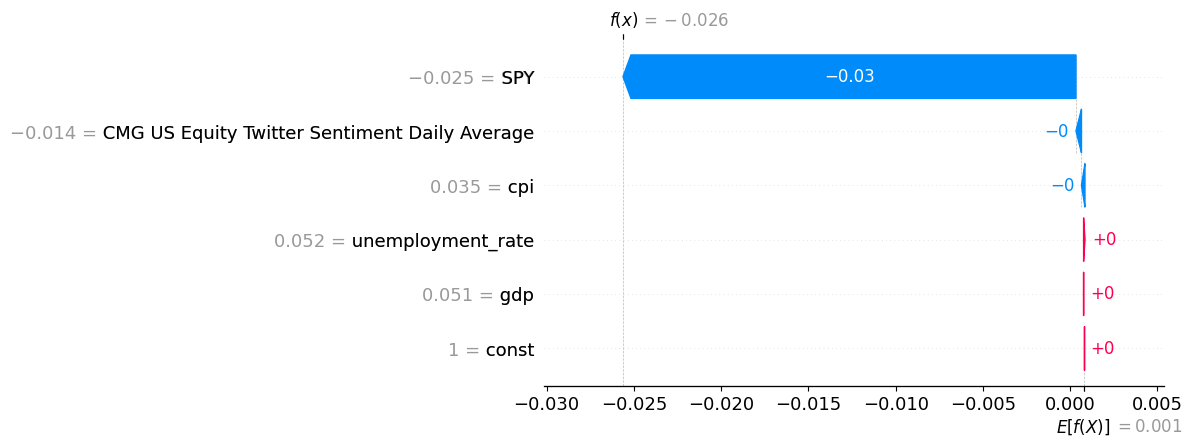

In [811]:

def model_predict(data):
    return model_CMG.predict(data).values

# Crear el objeto Explainer usando la función envoltorio
explainer = shap.Explainer(model_predict, X_CMG)

# Calcular los valores SHAP
shap_values = explainer(X_CMG)

# Visualizar la importancia de las características para una instancia específica
shap.plots.waterfall(shap_values[0])

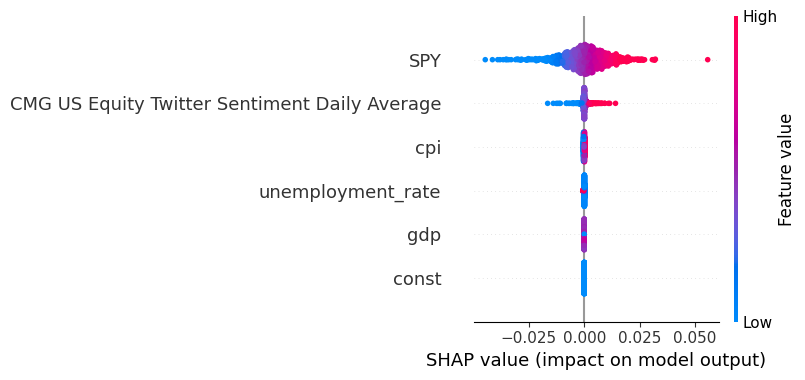

ValueError: Could not find feature named: Feature Name

In [812]:

shap.summary_plot(shap_values, X_CMG)

shap.dependence_plot('Feature Name', shap_values, X_CMG)

# TSLA

In [813]:
TSLA_sent = TSLA_sent.reindex(date_range, method='ffill')

In [814]:
combined_data_TSLA = pd.concat([TSLA_sent, returns['TSLA'], returns['SPY'],economics['gdp'], economics['cpi'], economics['unemployment_rate']], axis=1).dropna()

In [815]:
X_TSLA = combined_data_TSLA[['SPY', 'TSLA US Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_TSLA = combined_data_TSLA['TSLA']  

X_TSLA = sm.add_constant(X_TSLA)


model_TSLA = sm.OLS(y_TSLA, X_TSLA).fit()

print(model_TSLA.summary())

                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     75.77
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.49e-67
Time:                        21:30:58   Log-Likelihood:                 2067.5
No. Observations:                1022   AIC:                            -4123.
Df Residuals:                    1016   BIC:                            -4093.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

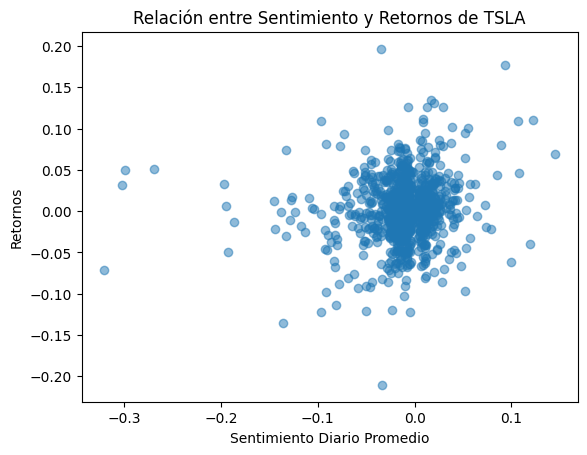

In [816]:
plt.scatter(combined_data_TSLA['TSLA US Equity Twitter Sentiment Daily Average'], combined_data_TSLA['TSLA'], alpha=0.5)
plt.xlabel('Sentimiento Diario Promedio')
plt.ylabel('Retornos')
plt.title('Relación entre Sentimiento y Retornos de TSLA')
plt.show()

In [817]:
y_pred = model_TSLA.predict(X_TSLA)  # Realizar predicciones basadas en el modelo
rmse_TSLA = np.sqrt(mean_squared_error(y_TSLA, y_pred))
print(f"RMSE: {rmse_TSLA}")

RMSE: 0.03200268418808353


In [818]:
# Mostrar solo los p-valores de los coeficientes
print("P-values of the model coefficients:")
print(model_TSLA.pvalues)

# Mostrar los intervalos de confianza de los coeficientes
print("Confidence intervals of the coefficients:")
print(model_TSLA.conf_int())

P-values of the model coefficients:
const                                             9.828378e-01
SPY                                               3.775755e-67
TSLA US Equity Twitter Sentiment Daily Average    4.691897e-05
gdp                                               5.666105e-01
cpi                                               7.223177e-01
unemployment_rate                                 8.441703e-01
dtype: float64
Confidence intervals of the coefficients:
                                                       0         1
const                                          -0.020260  0.020709
SPY                                             1.641653  2.027119
TSLA US Equity Twitter Sentiment Daily Average  0.059073  0.168130
gdp                                            -0.065221  0.119051
cpi                                            -0.165326  0.114616
unemployment_rate                              -0.286264  0.350016


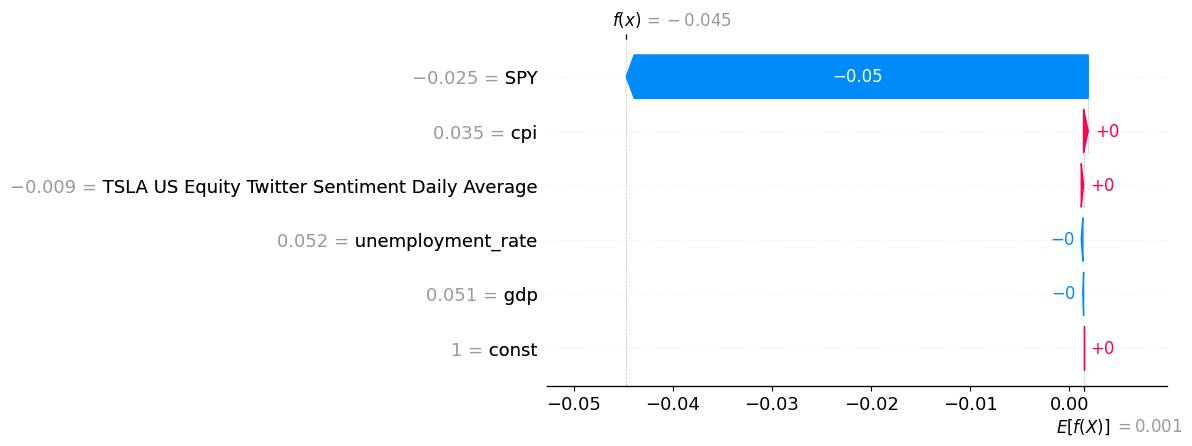

In [820]:

def model_predict(data):
    return model_TSLA.predict(data).values

# Crear el objeto Explainer usando la función envoltorio
explainer = shap.Explainer(model_predict, X_TSLA)

# Calcular los valores SHAP
shap_values = explainer(X_TSLA)

# Visualizar la importancia de las características para una instancia específica
shap.plots.waterfall(shap_values[0])

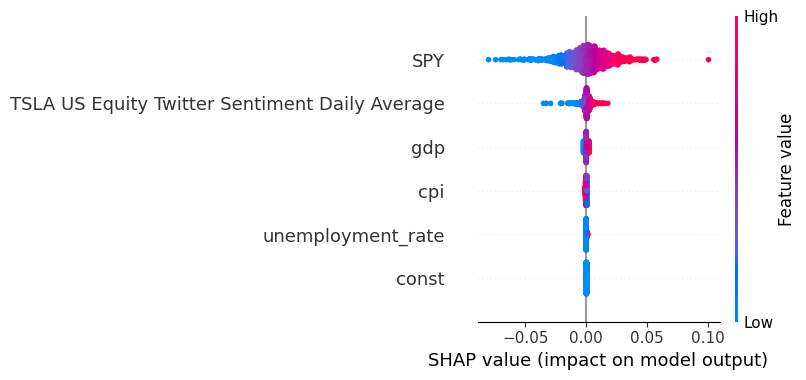

ValueError: Could not find feature named: Feature Name

In [821]:

shap.summary_plot(shap_values, X_TSLA)

shap.dependence_plot('Feature Name', shap_values, X_TSLA)

# NVDA

In [824]:
NVDA_sent = NVDA_sent.reindex(date_range, method='ffill')

In [825]:
combined_data_NVDA = pd.concat([NVDA_sent, returns['NVDA'], returns['SPY'],economics['gdp'], economics['cpi'], economics['unemployment_rate']], axis=1).dropna()

In [826]:
X_NVDA = combined_data_NVDA[['SPY', 'NVDA US Equity Twitter Sentiment Daily Average', 'gdp', 'cpi', 'unemployment_rate']]
y_NVDA = combined_data_NVDA['NVDA']  

X_NVDA = sm.add_constant(X_NVDA)


model_NVDA = sm.OLS(y_NVDA, X_NVDA).fit()

print(model_NVDA.summary())

                            OLS Regression Results                            
Dep. Variable:                   NVDA   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     189.6
Date:                Thu, 30 May 2024   Prob (F-statistic):          1.09e-142
Time:                        21:32:41   Log-Likelihood:                 2448.8
No. Observations:                1022   AIC:                            -4886.
Df Residuals:                    1016   BIC:                            -4856.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

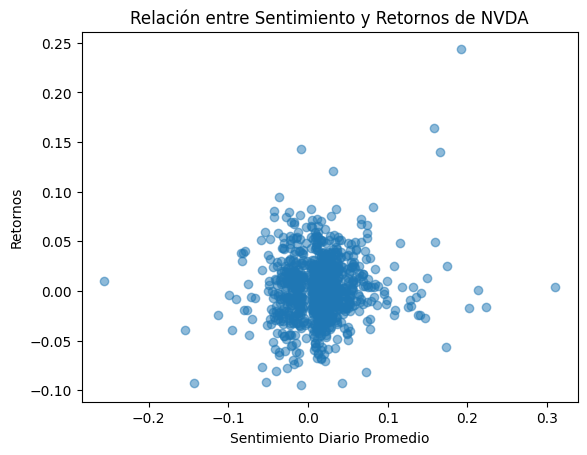

In [827]:
plt.scatter(combined_data_NVDA['NVDA US Equity Twitter Sentiment Daily Average'], combined_data_NVDA['NVDA'], alpha=0.5)
plt.xlabel('Sentimiento Diario Promedio')
plt.ylabel('Retornos')
plt.title('Relación entre Sentimiento y Retornos de NVDA')
plt.show()

In [828]:
y_pred = model_NVDA.predict(X_NVDA)  # Realizar predicciones basadas en el modelo
rmse_NVDA = np.sqrt(mean_squared_error(y_NVDA, y_pred))
print(f"RMSE: {rmse_NVDA}")

RMSE: 0.022036596782642602


In [829]:
# Mostrar solo los p-valores de los coeficientes
print("P-values of the model coefficients:")
print(model_NVDA.pvalues)

# Mostrar los intervalos de confianza de los coeficientes
print("Confidence intervals of the coefficients:")
print(model_NVDA.conf_int())

P-values of the model coefficients:
const                                              9.151626e-01
SPY                                               4.345881e-143
NVDA US Equity Twitter Sentiment Daily Average     3.356612e-06
gdp                                                1.215984e-01
cpi                                                8.038523e-02
unemployment_rate                                  3.240911e-01
dtype: float64
Confidence intervals of the coefficients:
                                                       0         1
const                                          -0.014927  0.013389
SPY                                             1.906058  2.171533
NVDA US Equity Twitter Sentiment Daily Average  0.049544  0.121257
gdp                                            -0.013388  0.113865
cpi                                            -0.010601  0.185550
unemployment_rate                              -0.326329  0.107978


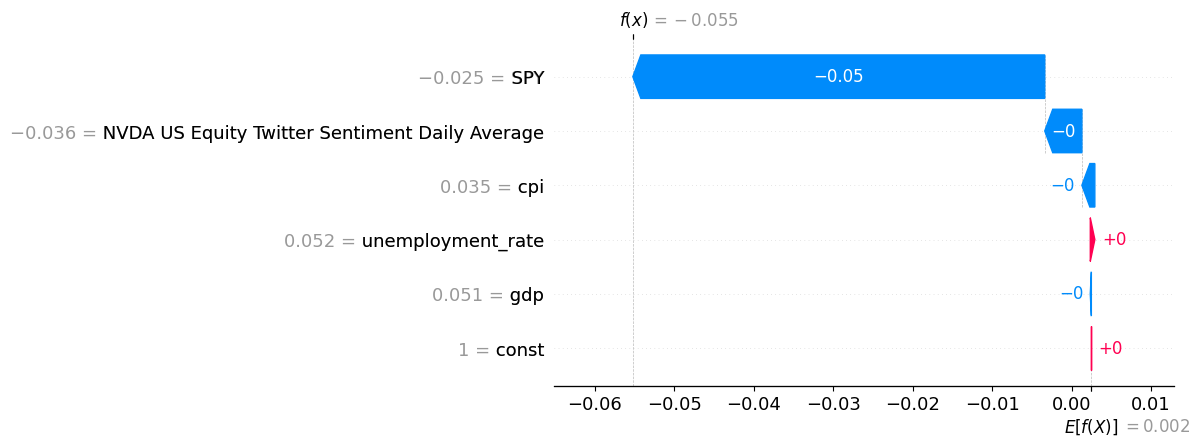

In [830]:

def model_predict(data):
    return model_NVDA.predict(data).values

# Crear el objeto Explainer usando la función envoltorio
explainer = shap.Explainer(model_predict, X_NVDA)

# Calcular los valores SHAP
shap_values = explainer(X_NVDA)

# Visualizar la importancia de las características para una instancia específica
shap.plots.waterfall(shap_values[0])

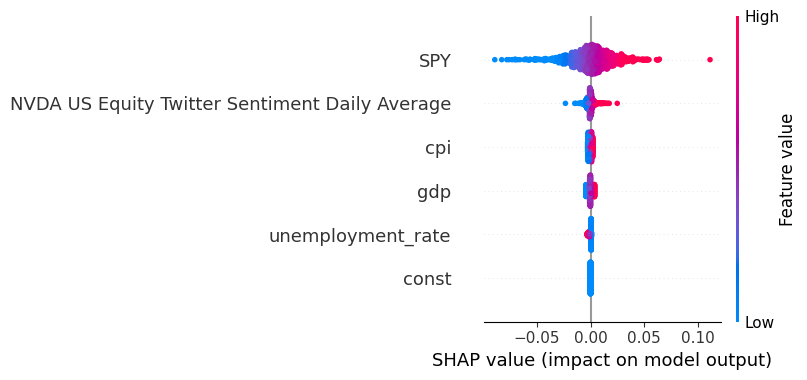

ValueError: Could not find feature named: Feature Name

In [831]:

shap.summary_plot(shap_values, X_NVDA)

shap.dependence_plot('Feature Name', shap_values, X_NVDA)